## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [3]:
df = pd.read_csv(r"D:\Mohamed data\RegData.csv",header=None)
x_points = df[0].values
y_points = df[1].values

#### Explore your data

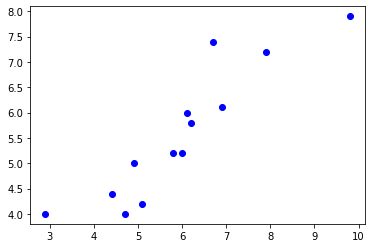

In [4]:
plt.scatter(x=x_points,y=y_points,c='b');

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

In [18]:
def GD_Optimizer(x_data,y_data,epochs,batch_size=4,gamma=0,alpha=0.001):
    x_data = x_data.reshape((-1,1))
    y_data = y_data.reshape((-1,1))
    theta = np.random.random(size=(2,1))
    theta_log = []
    loss =[]
    vt = 0
    m = len(x_data)
    b = batch_size
    steps = m//b if (m%b)==0 else (m//b)+1
    for _ in range(epochs):
        indices = np.random.permutation(m)
        x_data = x_data[indices]
        y_data = y_data[indices]
        for step in range(0,m,b):
            x_batch = x_data[step:step+b]
            y_batch = y_data[step:step+b]
            x_batch = np.concatenate((np.ones_like(x_batch),x_batch),axis=1)
            h = x_batch @ theta
            loss.append((1/(2*b))*np.sum(np.square(h-y_batch)))
            vt = gamma*vt + alpha * (1/b)*(x_batch.T@(h-y_batch))
            theta = theta - vt
            theta_log.append(theta)
    loss = np.array(loss)
    theta_log = np.array(theta_log)
    return theta ,loss,theta_log

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x

#### Note: you will need to iterate through all data points

The r2_score is: 0.7998246


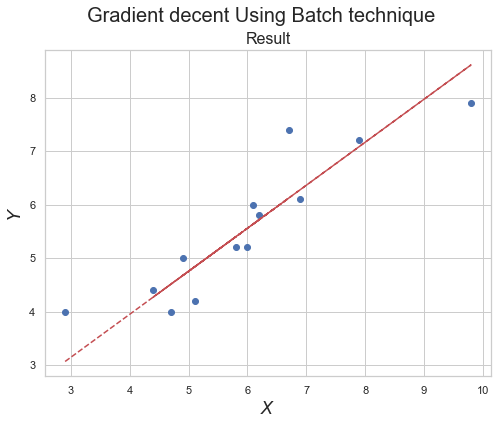

In [43]:
# Batch Gradient decent
EPOCHS =20
theta,loss,theta_log = GD_Optimizer(x_points,y_points,epochs=EPOCHS,batch_size=len(x_points),alpha=0.01)
h = theta[0] + theta[1]*x_points

print(f'The r2_score is: {np.round(r2_score(y_points,h),7)}')

fig = plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid")
plt.suptitle("Gradient decent Using Batch technique",fontsize=20)

ax_1 =  fig.add_subplot(111)
ax_1.scatter(x=x_points,y=y_points)
plt.plot(x_points,h,c='r',linestyle='--')
plt.title("Result",fontsize=16)
plt.xlabel("$X$", rotation=0, fontsize=18)
plt.ylabel("$Y$", rotation=90, fontsize=18);

### Use R2 score to evaluate LR equation output


In [24]:
from sklearn.metrics import r2_score
print(f'The r2_score is:  {np.round(r2_score(y_points,h),7)}')

The r2_score is:  0.7475209


## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

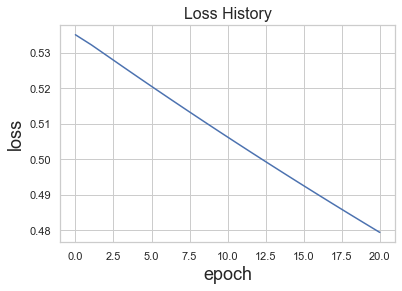

In [42]:
plt.plot(np.linspace(0,EPOCHS,loss.shape[0]),loss)
plt.title("Loss History",fontsize=16);
plt.xlabel("epoch", rotation=0, fontsize=18)
plt.ylabel("loss", rotation=90, fontsize=18);

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [25]:
df_2 = pd.read_csv(r"D:\Mohamed data\MultipleLinearRegression.csv")
x_points = df_2.iloc[:,:-1].values
y_points = df_2.iloc[:,-1].values


### Repeat your implementation but for more than one variable

In [27]:
def GD_Optimizer(x_data,y_data,epochs,batch_size=4,gamma=0.1,alpha=0.001):
    y_data = y_data.reshape((-1,1))
    theta = np.random.random(size=(x_data.shape[1]+1,1))
    theta_log = []
    loss =[]
    vt = np.zeros((x_data.shape[1]+1,1))
    m = len(y_data)
    b = batch_size
    steps = m//b if (m%b)==0 else (m//b)+1
    for _ in range(epochs):
        indices = np.random.permutation(m)
        x_data = x_data[indices]
        y_data = y_data[indices]
        for step in range(0,m,b):
            x_batch = x_data[step:step+b]
            y_batch = y_data[step:step+b]
            x_batch = np.concatenate((np.ones((x_batch.shape[0],1)),x_batch),axis=1)
            h = x_batch @ theta
            loss.append((1/(2*b))*np.sum(np.square(h-y_batch)))
            vt = gamma*vt + alpha * (1/b)*(x_batch.T@(h-y_batch))
            theta = theta - vt
            theta_log.append(theta)
    loss = np.array(loss)
    theta_log = np.array(theta_log)
    return theta ,loss,theta_log

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

### Plot loss vs. iterations

#### Use R2 score to evaluate LR equation output

r2_score 0.40205011465403495


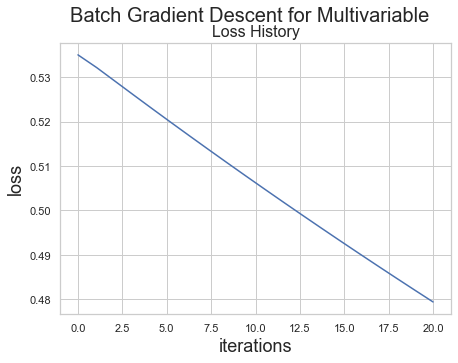

In [41]:
# Batch Gradient decent
EPOCHS = 20
theta,loss,theta_log = GD_Optimizer(x_points,y_points,epochs=EPOCHS,batch_size=len(x_points),alpha=0.0001)
h =  theta[0] +  x_points @ theta[1:]

fig = plt.figure(figsize=(7,5))
sns.set_theme(style="whitegrid")
plt.suptitle("Batch Gradient Descent for Multivariable",fontsize=20)

plt.plot(np.linspace(0,loss.shape[0],loss.shape[0]),loss)
print(f'r2_score {r2_score(y_points,h)}')
plt.title("Loss History",fontsize=16)
plt.xlabel("iterations", fontsize=18)
plt.ylabel("loss", rotation=90, fontsize=18);


# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [32]:
df = pd.read_csv(r"D:\Mohamed data\RegData.csv",header=None)
x_points = df[0].values
y_points = df[1].values
x_points = x_points.reshape((-1,1))
y_points = y_points.reshape((-1,1))

#### Train the model (fit the model to the training data)

In [33]:
model = LinearRegression()
model.fit(x_points,y_points)

LinearRegression()

#### Predict y values using the trained model

In [34]:
y_pred = model.predict(x_points)

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

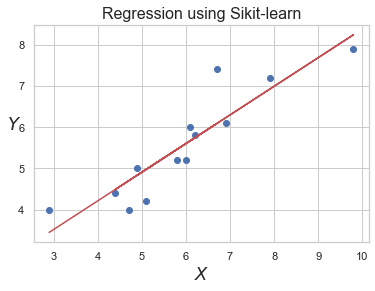

In [39]:
plt.scatter(x=x_points,y=y_points,c='b')
plt.plot(x_points,y_pred,c='r')
plt.title('Regression using Sikit-learn',fontsize=16)
plt.xlabel('$X$',fontsize=18)
plt.ylabel('$Y$', rotation=0, fontsize=18);

#### Use R2 score to evaluate model output

In [44]:
print(r2_score(y_points,y_pred))

0.8213156778363775


### Repeat for Mulivariate

In [45]:
df_2 = pd.read_csv(r"D:\Mohamed data\MultipleLinearRegression.csv")
x_points = df_2.iloc[:,:-1].values
y_points = df_2.iloc[:,-1].values
y_points = y_points.reshape((-1,1))

model = LinearRegression()
model.fit(x_points,y_points)

y_pred = model.predict(x_points)

print(r2_score(y_points,y_pred))

0.9896129198609613
